# Unit 10 Lecture 1 - Artificial Intelligence: Unsupervised Learning

CAI 4823: Artificial Intelligence for  Industrial Engineers<br>
University of Central Florida<br>
Dr. Ivan Garibay, Ramya Akula, Mostafa Saeidi, Madeline Schiappa, and Brett Belcher. 

## Notebook Learning Objectives
After studying this notebook students should be able to:
- understand basic concepts of unsupervised learning
- understand basic concepts about clustering algorithms
- apply the K-means clustering algorithm to a basic clustering problem
- apply spectral clustering and agglomerative clustering to basic problems
- compare varios clustering methods according to their performance


# Overview

In machine learning, the problem of unsupervised learning is that of trying to **find hidden structure in unlabeled data**. Since the examples given to the learner are unlabeled, there is **no error or reward signal** to evaluate a potential solution. This distinguishes unsupervised learning from supervised learning. 

Unsupervised learning is defined as the set of algorithms which learns from a **training set of unlableled or unannotated** examples, using the features of the inputs to categorize them together according to some **geometric** or **statistical** criteria. 

Unsupervised learning encompasses many techniques that seek to **summarize and explain key features** of the data. Many methods employed in unsupervised learning are based on *data mining* methods used to preprocess data.

Different *kinds* of unsupervised learning problems:

+ *Clustering:* partition examples into groups when no pre-defined categories/classes are available.
+ *Dimensionality reduction:* transformation of data from a high-dimensional into a low-dimensional space so that the low-dimensional representation retains meaningful properties of the original data. Lower-dimensional spaces are more desirable since they are computationaly tractable. Examples include principal component analysis, independent component analysis, non-negative matrix factorization.
+ *Outlier detection:* find unusual events (e.g. malfunction).

The most common unsupervised task is **clustering**. In this notebook, we will focus on the clustering and dimensionality reduction (in brief) tasks.

# Clustering

**Partition** unlabeled examples into *disjoint subsets of clusters*, such that:

+ Examples within a cluster are similar (*high intra-class* similarity).
+ Examples in different clusters are different (*low inter-class* similarity).

It can help in discovering new categories in an unsupervised manner (no sample category labels provided).

### Important questions in clustering

+ What is a *natural grouping* among these objects? 
    + Definition of "groupness"
    + Definition of "similarity/distance"

+ *How to group* samples?

+ *How many* clusters?
    + Fixed a priori?
    + Completely data driven?
    + Avoid “trivial” clusters - too large or small...
    + Which methods do work when the number of samples is huge?
    + Which methods do work when the number of classes is huge?, etc.

+ *What* is a *good grouping*? 
    + What objective measures can be defined to evaluate the quality of the clusters?

+ In which space to *group*? 
    + What to do in high-dimensional feature spaces?
 

<div class="alert alert-info"> <b>IMPORTANT:</b> Clustering is subjective issue.
</div>

Clustering will help us to analyze and get insight of the data, but the quality of the partition **depends on the application and the analyst**.

## Similarity and distance

The notion of similarity is a tough one, however we can use the notion of distance as a surrogate.

The most wide spread distance metric is the Minkowski distance:

$$d(a,b) = \big(\sum\limits_{i=1}^d |a_i-b_i|^p \big)^{1/p}$$

The most well-known instantiations of this metric are: 

+ $p = 2$ we have Euclidean distance, 
+ $p=1$ Manhattan distance, and 
+ $p=\infty$ max-distance.

## What is a good clustering? Defining metrics to measure clustering quality

The **Rand index** or **Rand measure** (named after William M. Rand) in statistics, and in particular in data clustering, is a measure of the similarity between two data clusterings. A form of the Rand index may be defined that is adjusted for the chance grouping of elements, this is the **adjusted Rand index**. From a mathematical standpoint, Rand index is related to the accuracy, but is applicable even when class labels are not used.

Given a set of n elements $S = \{o_1, \ldots, o_n\}$ and two partitions of S to compare, $X = \{X_1, \ldots, X_r\}$, a partition of $S$ into $r$ subsets, and $Y = \{Y_1, \ldots, Y_s\}$, a partition of $S$ into $s$ subsets, define the following:

+ **a,** the number of pairs of elements in S that are in the same set in X and in the same set in Y
+ **b,** the number of pairs of elements in S that are in different sets in X and in different sets in Y
+ **c,** the number of pairs of elements in S that are in the same set in X and in different sets in Y
+ **d,** the number of pairs of elements in S that are in different sets in X and in the same set in Y.

The Rand index, R, is:
$ R = \frac{a+b}{a+b+c+d} = \frac{a+b}{{n \choose 2 }}$


A clustering result satisfies **homogeneity** if all of its clusters contain only data points which are members of a single class.
```sklearn.metrics.homogeneity_score(labels_true, labels_pred)```


A clustering result satisfies **completeness** if all the data points that are members of a given class are elements of the same cluster.
```sklearn.metrics.completeness_score(labels_true, labels_pred)```

Both scores have positive values between 0.0 and 1.0, larger values being desirable.

In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt
from sklearn import metrics


Perfect labelings are homogeneous:

In [2]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0]))

1.000


Labelings that split one class into subclasses are also homogeneous:

In [3]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 1, 2]))

1.000


In [4]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))

1.000


Labelings that cluster samples from different clases are not homogeneous:

In [5]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 0, 1]))

0.000


In [6]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000


Perfect labelings are complete:

In [7]:
print(metrics.completeness_score([0, 0, 1, 1], [1, 1, 0, 0]))

1.0


Labelings that assign all class members to the same cluster are still complete: 

In [8]:
print(metrics.completeness_score([0, 0, 1, 1], [0, 0, 0, 0]))

1.0


In [9]:
print(metrics.completeness_score([0, 1, 2, 3], [0, 0, 1, 1]))

0.9999999999999999


When classes members are split across different clusters, the assignment is not complete:

In [10]:
print(metrics.completeness_score([0, 0, 1, 1], [0, 1, 0, 1]))

0.0


In [11]:
print(metrics.completeness_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.0


**V-measure** cluster labeling given a ground truth:
The V-measure is the harmonic mean between homogeneity and completeness:

  $$v = 2 \frac{ (homogeneity)  (completeness) } {homogeneity + completeness}$$

Is the  metric dependent of the absolute values of the labels?: will a permutation of the class or cluster label values change the score value in any way?

Is the metric symmetric wrt the switching label_true with label_pred?

This can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.

Perfect labelings are both homogeneous and complete, hence have score 1.0:

In [12]:
print (metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 1]))

print (metrics.v_measure_score([0, 0, 1, 1], [1, 1, 0, 0]))

1.0
1.0


**Question:** Labelings that **assign all classes members to the same clusters** are: ______________, but not __________:

In [13]:
print("%.3f" % metrics.completeness_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.homogeneity_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.v_measure_score([0, 0, 1, 2], [0, 0, 1, 1]))

print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 1, 1]))

1.000
0.000
0.000
0.800
0.667


Labelings that have pure clusters with members coming from the same classes are _ but un-necessary splits harm __ and thus penalize V-measure as well:

In [14]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 2]))

print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 1, 2, 3]))

0.800
0.667


If classes members are **completely split across different clusters**, the assignment is totally incomplete, hence the V-Measure is null:

In [15]:
print("%.3f" % metrics.v_measure_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.000


Clusters that include samples from **totally different classes** totally destroy the ____________ of the labeling, hence:

In [16]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000


**Advantages**

+ **Bounded scores**: 0.0 is as bad as it can be, 1.0 is a perfect score.

+ **Intuitive interpretation**: clustering with bad V-measure can be qualitatively analyzed in terms of homogeneity and completeness to better feel what ‘kind’ of mistakes is done by the assignment.

+ **No assumption** is made on the cluster structure: can be used to compare clustering algorithms such as K-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

**Drawbacks**

+ The previously introduced metrics are **not normalized with regards to random labeling**: this means that depending on the number of samples, clusters and ground truth classes, a completely random labeling will not always yield the same values for homogeneity, completeness and hence V-measure. In particular random labeling won’t yield zero scores especially when the number of clusters is large.

+ This problem can safely be ignored when **the number of samples** is high i.e. more than a thousand and the number of clusters is less than 10. 

+ These metrics require the **knowledge of the ground truth classes** while almost never available in practice or require manual assignment by human annotators (as in the supervised learning setting).

And if we do not have ground truth?


The **Silhouette Coefficient** is calculated using the *mean intra-cluster distance* (a) and the *mean nearest-cluster distance* (b) for each sample. The Silhouette Coefficient for a sample is:

                           (b - a) / max(a, b).

where b is the distance between a sample and the nearest cluster that the sample is not part of. Note that Silhouette Coefficent is only defined if number of labels is: $ 2 <= n_{labels} <= n_{samples} - 1$ (WHY?).

**Test:** 

+ The best value is _____.

+ The worst value is _____. 

+ Pixel values near 0 indicate ________. 


*Advantages**

The score is bounded between -1 and +1. Scores around zero indicate ___________ clusters (WHY?).

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

**Drawbacks**

The Silhouette Coefficient is generally higher for convex clusters. WHY?

# Clustering techniques: how to group samples?

There are two big families of clustering techniques:

+ **Partitional algorithms:** Start with a random partititon and refine it iteratively.
+ **Hierarchical algorithms:** Agglomerative (bottom-up), top-down.

### Partitional algorithms

Partitional algorithms can be divided in two branches:

+ Hard partition algorithms, such as *K-means*, assign a unique cluster value to each element in the feature space.
+ Soft partition algorithms, such as *Mixture of Gaussians*, can be viewed as density estimators and assign a confidence or probability to each point in the space.

In order to build our intuition about clustering, we will start with the simplest, but one of the most popular methods: K-means.


# K-means Clustering algorithm

**Algorithm:**
1. Initialize the value  $K$ of desirable clusters.
2. Initialize the $K$ cluster centers, e.g. randomly.
3. Decide the class memberships of the N data samples by assigning them to the nearest cluster centroids (e.g. the center of gravity or mean).
4. Re-estimate the $K$ cluster centers, by assuming the memberships found above are correct.
5. If none of the N objects changed membership in the last iteration, exit. Otherwise go to 3.

Let us see this in action:

In [17]:
import numpy as np

#Create some data: X is two dimentional (coordinates) and contains 40 data point per each "blob"
MAXN=40
X = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)]) 
#np.random.randn(MAXN,2) return an array of random numbers of size ›xM
X = np.concatenate([X,[8,3]+1.2*np.random.randn(MAXN,2)])
X.shape

(120, 2)

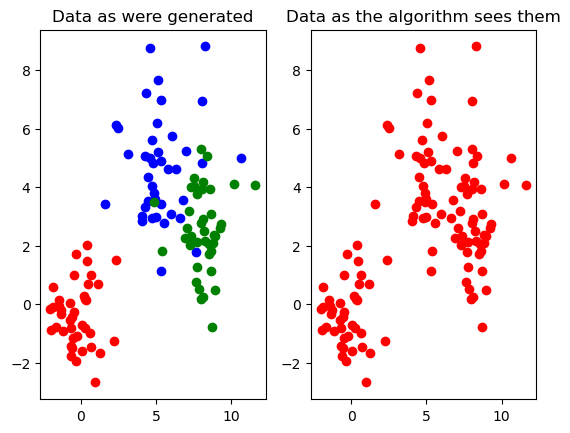

In [18]:
#Just for visualization purposes, create the labels of the 3 distributions. Lables are 1,2,3
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')#numpy.ravel() returns a flattened array
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as were generated')

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as the algorithm sees them')

#plt.savefig('../Output/sample.png')
plt.show()


In [19]:
from sklearn import cluster
import warnings
warnings.filterwarnings('ignore') 


K=3 # Assuming to be 3 clusters!

clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

KMeans(init='random', n_clusters=3)

**Note**: Each clustering algorithm comes in two variants: a class, that implements the *fit* method to learn the clusters on train data, and a *predict* function, that, given test data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the *labels_* attribute.
    

In [20]:
# Calculating predicted labels (y_pred) and comparing with true labels (y)

y_pred=clf.predict(X)

print ("y= ",y.shape) # y true lables, one column and 120 rows
print ("y.ravel()= ",y.ravel(), y.ravel().shape) #y true lables as a vector
print ("clf.labels_= ",clf.labels_, clf.labels_.shape)     # predicted labels
print ("y_pred= ",y_pred, y_pred.shape)    # or equivalent predicted labels

y=  (120, 1)
y.ravel()=  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.] (120,)
clf.labels_=  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0] (120,)
y_pred=  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0] (120,)


In [21]:
print (X[(y==1).ravel(),0]) #numpy.ravel() returns a flattened array
print (X[(y==1).ravel(),1])

[ 0.98634361  0.68052174  0.30968992 -0.22256403 -0.50659592 -0.56883906
  0.42026249  0.63669441  0.21111276  0.6961414  -2.00327278  1.18372468
  2.22276266 -0.63237132 -1.96135159  1.27448551  0.50707168 -0.73836998
 -1.45001288  0.38228213  2.36081053 -0.66139356 -1.27882188 -0.5451108
  0.41653923  0.28428552 -0.71499798 -1.15323174 -1.40771179  0.07554765
 -1.65232038 -1.33473521 -1.85584522 -1.86055851 -0.28364247 -0.65496786
 -0.44589589 -0.45318053  0.08107159 -0.3176736 ]
[-2.67987462  1.00665613  0.16997577 -1.08179119 -1.17303803 -1.51266983
  1.46400245 -0.98520036  0.28093309 -1.46818559 -0.17638423  0.68472781
 -1.27578109 -1.75810095 -0.898713   -1.65525157  0.67279293 -0.54903608
  0.12579375  0.14102216  1.50954768 -0.82803527 -0.18509686 -0.42814999
  2.02160329 -0.83128839  0.04829219 -0.91126558 -0.06629515 -1.61133612
 -0.78450325 -0.35170436  0.57772368 -0.08307532  1.70787632 -1.4197276
 -0.2635654   1.00949026 -0.71028506 -1.95979295]


## Original Generated Data (with labels)

In [22]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((6,5))

In [23]:
# code to generate the image with cluster partitions
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape     
data=np.c_[XX.ravel(),YY.ravel()] 
    # c_ translates slice objects to concatenation along the second axis.

In [24]:
Z=clf.predict(data) # returns the labels of the data for all area of image
print(Z, Z.shape)

[2 2 2 ... 0 0 0] (40000,)


## How many "misclusterings" do we have?

In [25]:
# Visualize space partition
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', 
           extent=(-5,15,-5,15),alpha=0.2, vmin=0, vmax=K-1)
plt.title('Space partitions and "misclusterings"', size=14)
#data points
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf() #get reference to current figure
fig.set_size_inches((6,5))

#plt.savefig("../Output/samples3.png",dpi=300, bbox_inches='tight')


## Visualizing final predicted labels by colored points and space tesselation

In [26]:
plt.title('Final result of K-means', size=14)

plt.scatter(X[(y_pred==1).ravel(),0],X[(y_pred==1).ravel(),1],color='r')
plt.scatter(X[(y_pred==2).ravel(),0],X[(y_pred==2).ravel(),1],color='b')
plt.scatter(X[(y_pred==0).ravel(),0],X[(y_pred==0).ravel(),1],color='g')

plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', 
           extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
fig = plt.gcf()
fig.set_size_inches((6,5))

#plt.savefig('../Output/randscore.png',dpi=300, bbox_inches='tight')


## Summary of Results for K-Means Clustering

In [27]:
clf = cluster.KMeans(init='random', n_clusters=K, random_state=0) 
    #initialize the k-means clustering
clf.fit(X) #run the k-means clustering
Zx=clf.predict(X)

plt.subplot(1,3,1)
plt.title('Original labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')  # g
fig = plt.gcf()
fig.set_size_inches((12,3))

plt.subplot(1,3,2)
plt.title('Data without labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='r') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r')  # g
fig = plt.gcf()
fig.set_size_inches((12,3))

plt.subplot(1,3,3)
plt.title('Clustering labels', size=14)
plt.scatter(X[(y_pred==1).ravel(),0],X[(y_pred==1).ravel(),1],color='r')
plt.scatter(X[(y_pred==2).ravel(),0],X[(y_pred==2).ravel(),1],color='b')
plt.scatter(X[(y_pred==0).ravel(),0],X[(y_pred==0).ravel(),1],color='g')
fig = plt.gcf()
fig.set_size_inches((12,3))


The K-means algorithm clusters data by trying to separate samples in $n$ groups of equal variance. In other words, the K-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean of the samples in the cluster. The means are commonly called the cluster **“centroids”**. 

      Should the centroids belong to the original set of points?

The K-means algorithm aims to choose centroids minimizing a criterion known as the **inertia** <inertia> or **within-cluster** sum-of-squares:

  Inertia=$\displaystyle\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$

**Inertia**, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are. 

Several issues should be taken into account:

+ Inertia makes the **assumption** that clusters are **convex and isotropic** (WHY?), which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

+ Can the algorithm assures **converging** to the global minimum? - Given enough time, K-means will always converge.

+ This algorithm requires the **number of clusters to be specified**. 

+ It scales well to **large number of samples** and has been used across a large range of application areas in many different fields.






The computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='kmeans++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization.

    

**Notes:** Some seeds can result in poor convergence rate, or convergence to sub-optimal clusterings:
 
 **Summary:**
 
 + (+) Select good seeds using a heuristic (e.g. seeds with large distance among them).
 + (+) Try out multiple starting points. 
 + (+) Initialize with the results of another method.
 
 
 + (-) Tends to look for spherical clusters.
 + (-) Prone to local minima stabilization.

### k-means parameters
 
```k-means++``` (default) selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence optimal. 

```random``` choose n_clusters observations (rows) at random from data for the initial centroids.

```n_init``` (default=10) Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

```max_iterint``` (default=300) Maximum number of iterations of the k-means algorithm for a single run.

In [28]:
from sklearn import metrics

clf = cluster.KMeans(n_clusters=K, init='k-means++',  random_state=0, 
                     max_iter=300, n_init=10) 
                                        #initialize the k-means clustering
clf.fit(X)                              #run the k-means clustering

print ('Final evaluation of the clustering:')
print('Inertia: %.2f' %  clf.inertia_)
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(), clf.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y.ravel(), clf.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y.ravel(), clf.labels_))            
print('V_measure %.2f' %  metrics.v_measure_score(y.ravel(), clf.labels_))
print('Silhouette %.2f' %  metrics.silhouette_score(X, clf.labels_, metric='euclidean'))

Final evaluation of the clustering:
Inertia: 393.31
Adjusted_rand_score 0.84
Homogeneity 0.83
Completeness 0.84
V_measure 0.83
Silhouette 0.54


In [29]:
clf1 = cluster.KMeans(n_clusters=K,  init='random', random_state=0, 
                      max_iter=2, n_init=2) 
                                    #initialize the k-means clustering
clf1.fit(X)                         #run the k-means clustering

print ('Final evaluation of the clustering:')
print ('Inertia: %.2f' % clf1.inertia_)
print ('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(), clf1.labels_))
print ('Homogeneity %.2f' % metrics.homogeneity_score(y.ravel(), clf1.labels_))
print ('Completeness %.2f' % metrics.completeness_score(y.ravel(), clf1.labels_))            
print ('V_measure %.2f' % metrics.v_measure_score(y.ravel(), clf1.labels_))
print ('Silhouette %.2f' % metrics.silhouette_score(X, clf1.labels_, metric='euclidean'))

Final evaluation of the clustering:
Inertia: 398.29
Adjusted_rand_score 0.80
Homogeneity 0.80
Completeness 0.81
V_measure 0.81
Silhouette 0.54


# Spectral clustering

Our next method in this notebook will be spectral clustering. 

Up to this point, we have considered clustering as finding data groups following a notion of compactness. Another way of looking at what a cluster is, is given by the connectivity (or similiarity).

**Spectral clustering** refers to a family of methods that use spectral techniques. Specifically, these techniques are related to the eigen-decomposition of an affinity or similarity matrix and attempt to solve the problem of clustering according to connectivity.
Let us consider an ideal similarity matrix of two clear sets.

 Let us denote the similarity matrix, S, as the matrix Sij = s(xi; xj) gives the similarity between observations xi and xj. The simplest similarity measure is the Euclidean distance.

We expect that when two points are from different clusters, they are far away. However, it might also happen that two points from the same cluster are also far away, but still belong to the same cluster as soon as there is a sequence of points from the same cluster that form a path between them. Then, we compute an affinity matrix $A$. $A_{ij} >= 0$ represents a measure of the similarity between data points with indexes $i$ and $j$, hence $A$ is made of positive values and is symmetric.   An easy way to do it is by applying a k-nearest neighbour to build a graph connecting just the k closest dataset points.  Using the affinity matrix, clustering is considered as a graph-partition problem, where connected graph components are interpreted as clusters. The graph constructed by the spectral clustering must be partitioned such that edges connecting different clusters should have low weighs, and edges within the same cluster must have high values. Additionally to the affinity matrix, we need a degree matrix D so that each diagonal value is the degree of the respective graph node and all other positions are zero. Finally, we compute the unnormalized graph Laplacian ($U = D A$).

If we assume that there are k clusters, the next step is to find the k smallest eigenvectors, without considering the trivial constant eigenvector. Each row of the matrix formed by the k smallest eigenvectors of the Laplacian matrix defines a transformation for data xi. Thus, in this transformed space, we can apply the K-means clustering in order to find the final clusters. If we do not know in advance the number of clusters k, we can look for sudden change in the sorted eigenvalues of the matrix, U and keep the smallest ones. 

Let us illustrate it on some eamples with non Gaussian distribution. Scikit-learn has a library to generate  datasets with different shapes like moons, blobs, etc.

In [30]:
from sklearn.datasets import make_blobs,make_moons
import matplotlib.pyplot as plt

# X, y = make_blobs() ; 
X, labels_true = make_blobs(n_samples=1000, centers=3, cluster_std=[1.7,1.7,1.7])

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='r', marker='o',s=20) #slice X all rows first column, all rows second column
plt.axis('equal')            # c, color; marker; s, size of marker 
plt.title('Compact clusters: 3-blobs data',size=14)

[Xmoons, ymoons] = make_moons(n_samples=300, noise=.05)
plt.subplot(1,2,2)
plt.scatter(Xmoons[:, 0], Xmoons[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
plt.title('Connectivity-base clusters: 2-moons data', size=14)
fig = plt.gcf()
fig.set_size_inches((11,6))

## How would k-means perform in 2-moons data?

Let apply k-means with k=2

In [31]:
plt.subplot(1,2,1)
plt.scatter(Xmoons[:, 0], Xmoons[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
 
# Cluster using k-means
clf = cluster.KMeans(n_clusters=2,init='k-means++')
clf.fit(Xmoons)
y_pred=clf.predict(Xmoons)
 
# Visualize k-means result
plt.subplot(1,2,2)
plt.scatter(Xmoons[y_pred==0, 0], Xmoons[y_pred==0, 1], c='b', marker='o',s=20) 
plt.scatter(Xmoons[y_pred==1, 0], Xmoons[y_pred==1, 1], c='y', marker='o',s=20) 
plt.axis('equal')
fig=plt.gcf()
fig.set_size_inches((11,6))

Note that since K-means looks for spheric clusters, it is unable to separate the two moon data.

**This is a problem!**


## Lets now try using spectral clustering on the 2-moons data

Let us apply the Spectral clustering with ```n_clusters=2``` and  
                                      ```affinity="nearest_neighbors"```

In [32]:
import numpy as np
from sklearn import cluster
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import euclidean_distances
 
#colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
#colors = np.hstack([colors] * 20)
 
# normalize dataset for easier parameter selection
#X = StandardScaler().fit_transform(Xmoons)
 
# Compute distances
#distances = euclidean_distances(Xmoons)
    
spectral = cluster.SpectralClustering(n_clusters=2, 
                                      affinity="nearest_neighbors")
 
spectral.fit(Xmoons)
y_pred = spectral.labels_.astype(int)
            

Visualizing the spectral clustering results:

In [33]:

plt.subplot(1,2,1)
plt.scatter(Xmoons[:, 0], Xmoons[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
plt.title('Original Data',size=14)
 
plt.subplot(1,2,2)
plt.scatter(Xmoons[y_pred==0, 0], Xmoons[y_pred==0, 1], c='b', 
            marker='o',s=20) 
plt.scatter(Xmoons[y_pred==1, 0], Xmoons[y_pred==1, 1], c='y', 
            marker='o',s=20) 
plt.axis('equal')
plt.title('Spectral Output',size=14)

fig=plt.gcf()
fig.set_size_inches((11,6))
#plt.scatter(Xmoons[:, 0], Xmoons[:, 1], color=colors[y_pred].tolist(), s=10)

Let us compare the result above to the K-means results. It is key to notive that since K-means looks for spheric clusters, it is unable to separate the two moon data, in contrast to the spectral clustering which is looking for connectivity. Connectivity in our example is defined by "nearest neighbours" using  ```affinity="nearest_neighbors"``` 

**Observations:**

+ In most of the cases, the clustering is performed on the **graph Laplacian matrix** ($L = D - A$), where $D$ is the **degree matrix** (a diagonal matrix where each element $d_{i,j}$ counts the number of edges the node has) and the role of the similarity matrix is now given by the **affinity matrix** ($A$).
+ Because the Laplacian is related to $-A$, instead of computing the second larger eigenvector,  the second smaller eigenvector is checked.

#  Hierarchical clustering

Another interesting clustering technique is hierarchical clustering. Hierarchical clustering is a general family of clustering algorithms that build nested clusters by *merging or splitting* them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the *leaves* being the clusters with only one sample. This is a nice tool, because of its interpretability. The result of the technique is a *tree* showing the similarity among the samples. *Partitioning* is computed by selecting a cut on that tree at a certain level. The tree is usually called **dendrogram**.

**Bottom-Up agglomerative clustering sketch of algorithm**

+ Starts with each sample data in a separate cluster.
+ Then, repeatedly joins the closest pair of clusters.
+ Until there is only one cluster.

The history of merging forms a binary tree or hierarchy.

**Top-Down divisive clustering sketch of algorithm**

+ Starting with all the data in a single cluster.
+ Consider every possible way to divide the cluster into two. Choose the best division.
+ Recursively operate on both sides.

The **Agglomerative Clustering** performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. 

**Defining the similarity of two clusters:**

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

+ *Maximum* or *complete* maximum linkage uses the maximum distance between observations of pairs of clusters. Based on the similarity of the two least similar members, it will give tight spherical clusters.

+ *Average* linkage uses the average of the distances between all observations of pairs of clusters.

+ *Single* linkage uses the minimum of the distances. It can create chain effects, such as follow the nearest neighbor.

+ *Ward*  minimizes the variance of the clusters being merged. 

AgglomerativeClustering can also *scale to large number* of samples when it is used jointly with a *connectivity matrix*, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

Let us illustrate how the different linkages work with an example. Let us generate three clusters as follows:

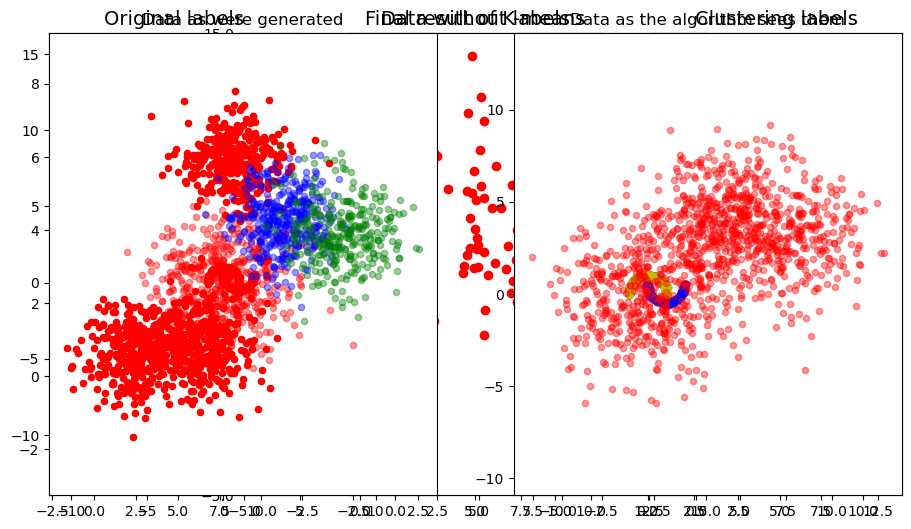

In [34]:
MAXN1 =500
MAXN2 =400
MAXN3 =300
X1 = np.concatenate ([2.25*np.random.randn(MAXN1,2),4+1.7* np.random.randn (MAXN2 ,2)])
X1 = np.concatenate ([X1,[8,3]+1.9* np.random.randn(MAXN3 ,2)])
y1 = np.concatenate ([ np.ones ((MAXN1,1)),2* np.ones((MAXN2,1))])
y1 = np.concatenate ([y1,3* np.ones((MAXN3,1))]).ravel()
y1 = np.int_(y1)
labels_y1=['+','*','o']
colors=['r','g', 'b']

plt.subplot(1,2,1)
plt.scatter(X1[(y1==1).ravel(),0],X1[(y1==1).ravel(),1],color='r', marker='o',s=20, alpha=0.4)#numpy.ravel() returns a flattened array
plt.scatter(X1[(y1==2).ravel(),0],X1[(y1==2).ravel(),1],color='b', marker='o',s=20, alpha=0.4)
plt.scatter(X1[(y1==3).ravel(),0],X1[(y1==3).ravel(),1],color='g', marker='o',s=20, alpha=0.4)
plt.title('Data as were generated')

plt.subplot(1,2,2)
plt.scatter(X1[:,0],X1[:,1],color='r', marker='o',s=20, alpha=0.4)
plt.title('Data as the algorithm sees them')

fig=plt.gcf()
fig.set_size_inches((11,6))

plt.savefig('../Output/sample2.png')
plt.show()

Let us apply agglomerative clustering using the different linkages:

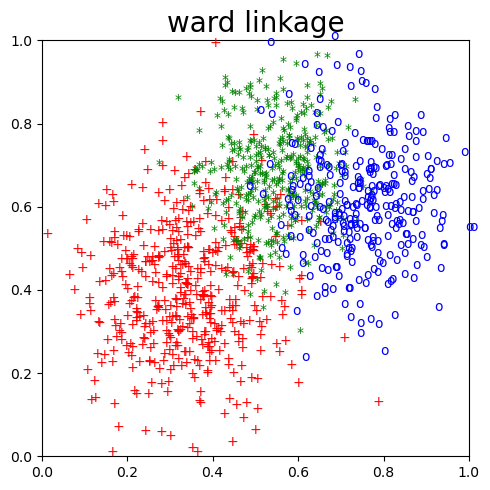

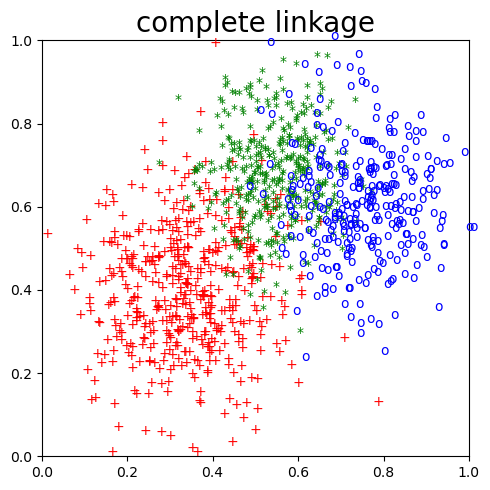

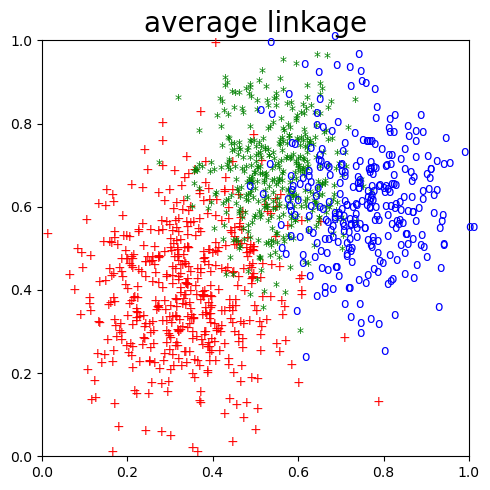

In [35]:
import time

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'complete', 'average'):
    clustering = AgglomerativeClustering(linkage=linkage,n_clusters =3)
    clustering.fit(X1)
    
    x_min , x_max = np.min (X1, axis =0) , np.max (X1,axis =0)
    X1 = (X1 - x_min ) / ( x_max - x_min )
    fig = plt.figure ()
    fig.set_size_inches((5,5))
    for i in range (X1.shape [0]) :
        plt.text(X1[i,0],X1[i,1],labels_y1[y1[i]-1],color=colors[y1[i]-1])
    plt.title ("%s linkage" % linkage,size =20)
    plt.tight_layout()
    plt.savefig("../Output/%slinkage.png" % linkage,dpi=300, bbox_inches='tight')

    
plt.show()


Agglomerative clustering has a “rich get richer” behavior that leads to *uneven cluster sizes*. In this regard, complete linkage is the worst strategy, and *Ward* gives the most regular sizes. However, the affinity cannot be varied with Ward, thus for non Euclidean metrics, *average linkage* is a good alternative. Let us illustrate the performance on some other datasets with more complex distributions:

## Applying agglomerative clustering to 2-circles data
Lets use ```n_clusters=4```

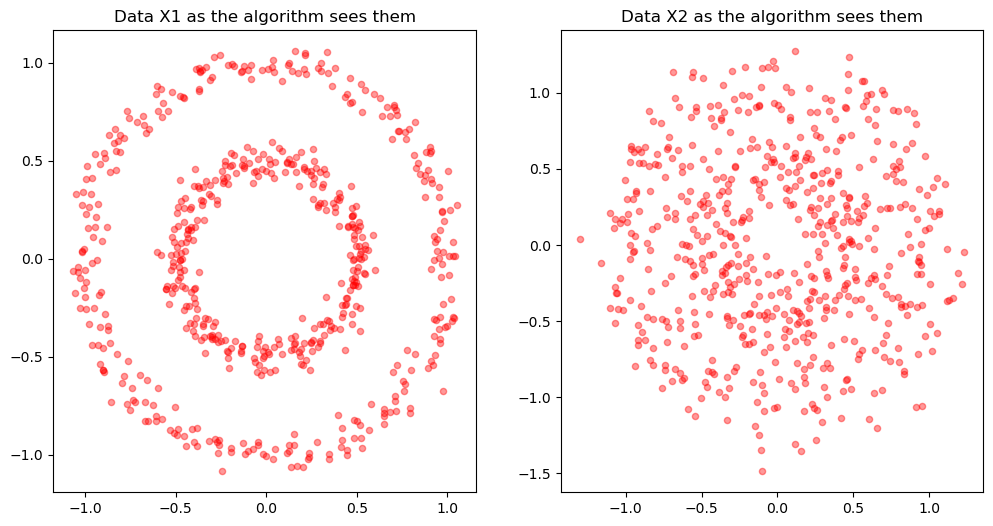

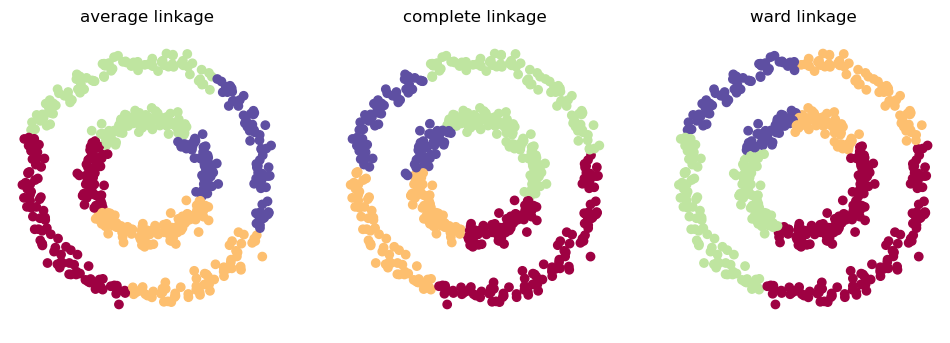

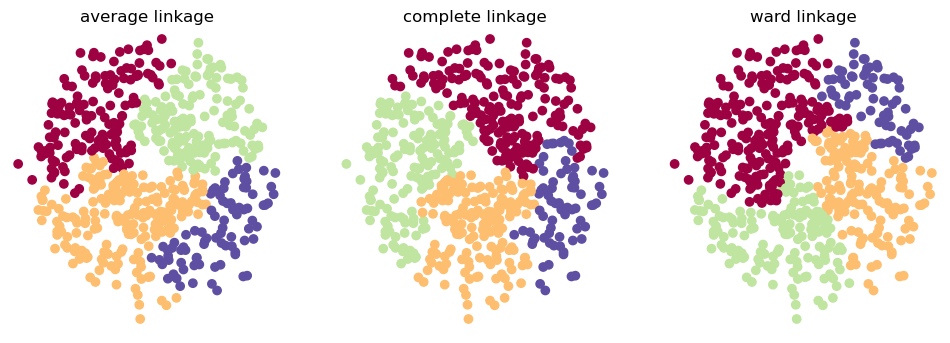

In [36]:

from sklearn import cluster, datasets
from sklearn.cluster import AgglomerativeClustering

#make_circles = Make a large circle containing a smaller circle in 2d.
[X1, y1]  = datasets.make_circles(n_samples=600, factor=.5, noise=.05) 
[X2, y2]  = datasets.make_circles(n_samples=600, factor=.5, noise=.15)

n_clusters=4

plt.subplot(1,2,1)
plt.scatter(X1[:, 0], X1[:, 1], color='r', marker='o',s=20, alpha=0.4)
plt.title('Data X1 as the algorithm sees them')

plt.subplot(1,2,2)
plt.scatter(X2[:, 0], X2[:, 1], color='r', marker='o',s=20, alpha=0.4)
plt.title('Data X2 as the algorithm sees them')

fig=plt.gcf()
fig.set_size_inches((12,6))


for X in [X1,X2]:
    plt.figure(figsize=(12, 4))
    for index, linkage in enumerate(('average', 'complete', 'ward')):

            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,n_clusters=n_clusters)
            model.fit(X)
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.get_cmap('Spectral'))
            plt.title('%s linkage' % linkage,fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')
    
    plt.show()



**Exercise:** What happens if we now use ```n_clusters=2```? Since there are 2 circles, would that improve our results?

 # Adding connectivity constraints

An interesting aspect of Agglomerative Clustering is that connectivity constraints can be added to this algorithm (only adjacent clusters can be merged together), through a connectivity matrix that defines for each sample the neighboring samples following a given structure of the data. For instance, in the swiss-roll example below, the connectivity constraints forbid the merging of points that are not adjacent on the swiss roll, and thus avoid forming clusters that extend across overlapping folds of the roll.

These constraints are useful to *impose a certain local structure*, but they also make the algorithm **faster**, especially when the number of the samples is high.
The connectivity constraints are imposed via a **connectivity matrix**: a scipy sparse matrix that has elements only at the intersection of a row and a column with indices of the dataset that should be connected. 

This matrix can be constructed from *a-priori information*: for instance, you may wish to cluster web pages by only merging pages with a *link pointing from one to another*. 

It can also be learned from the data, for instance using sklearn.neighbors.kneighbors_graph to restrict merging to nearest neighbors as in this example, or using sklearn.feature_extraction.image.grid_to_graph to enable only merging of neighboring pixels on an image.

This example shows the effect of imposing a connectivity graph to capture local structure in the data. The graph is simply the graph of 20 nearest neighbors.
Two consequences of imposing a connectivity can be seen. First clustering with a connectivity matrix is much faster.
Second, when using a connectivity matrix, average and complete linkage are unstable and tend to create a few clusters that grow very quickly. Indeed, average and complete linkage fight this percolation behavior by considering all the distances between two clusters when merging them. The connectivity graph breaks this mechanism. This effect is more pronounced for very sparse graphs (try decreasing the number of neighbors in kneighbors_graph) and with complete linkage. In particular, having a very small number of neighbors in the graph, imposes a geometry that is close to that of single linkage, which is well known to have this percolation instability.

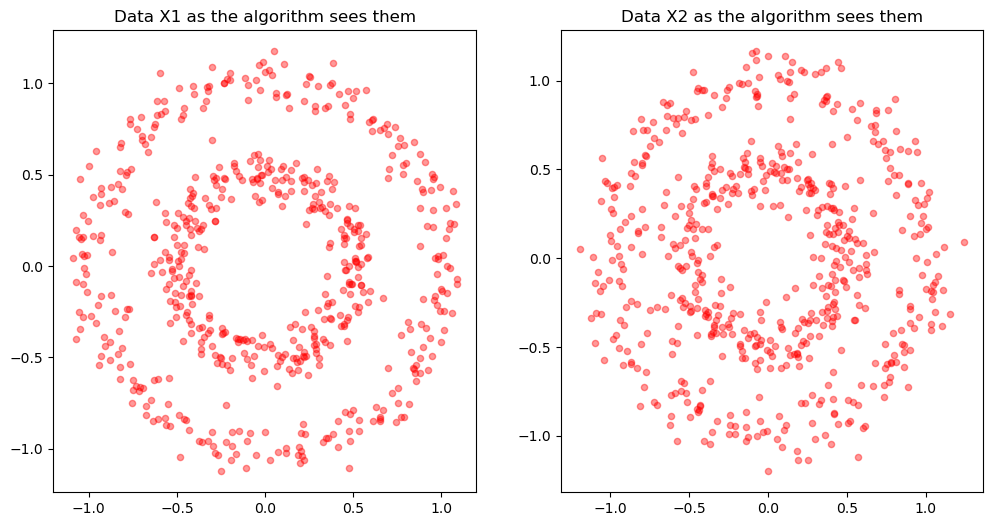

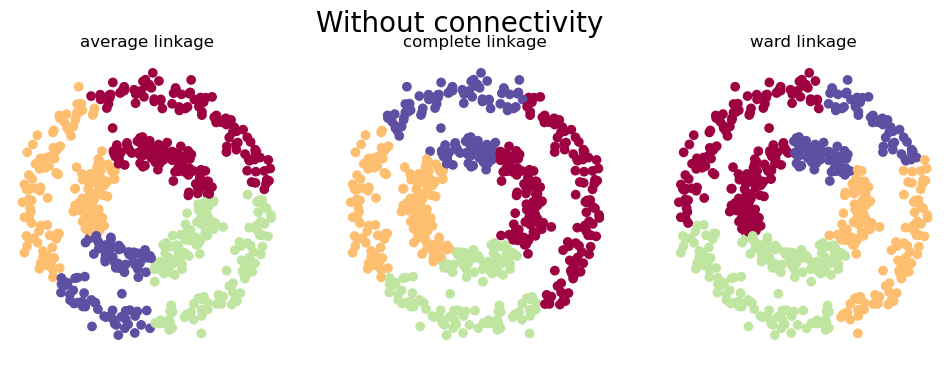

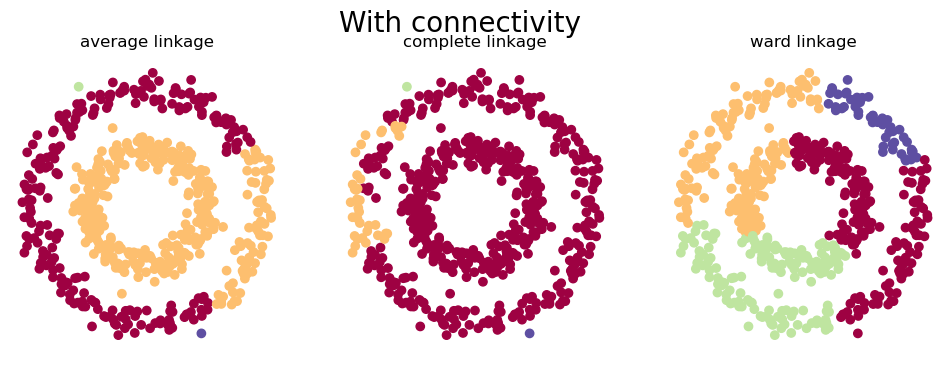

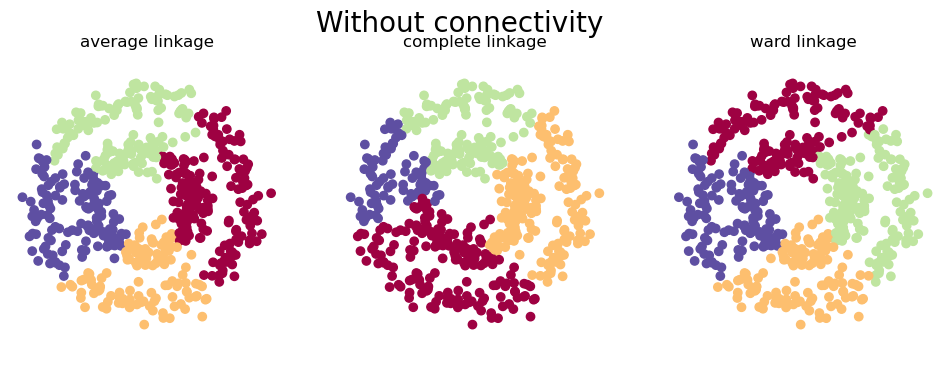

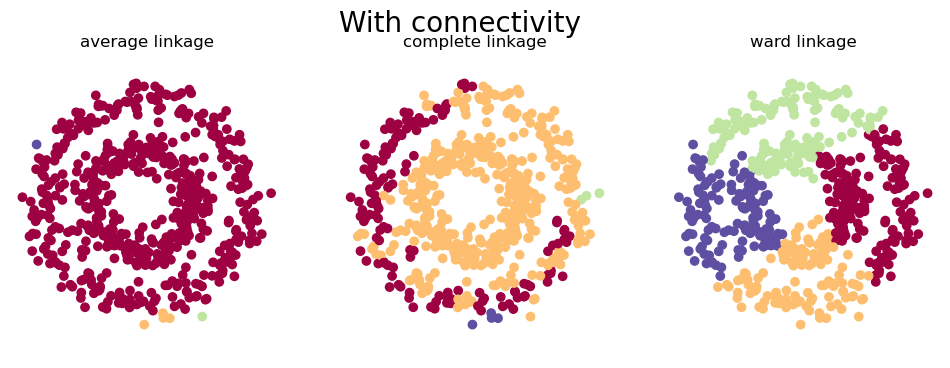

In [37]:
[X1, y1]  = datasets.make_circles(n_samples=600, factor=.5, noise=.07)
[X2, y2]  = datasets.make_circles(n_samples=600, factor=.5, noise=.1)

plt.subplot(1,2,1)
plt.scatter(X1[:, 0], X1[:, 1], color='r', marker='o',s=20, alpha=0.4)
plt.title('Data X1 as the algorithm sees them')

plt.subplot(1,2,2)
plt.scatter(X2[:, 0], X2[:, 1], color='r', marker='o',s=20, alpha=0.4)
plt.title('Data X2 as the algorithm sees them')

fig=plt.gcf()
fig.set_size_inches((12,6))

n_clusters=4

for X in [X1,X2]:
    
# Change 5 in kneighbors_graph(X, 5) to see what happens for 50, for 500, why?   
  knn_graph = kneighbors_graph(X, 15)
  for connectivity in (None, knn_graph):
    plt.figure(figsize=(12, 4))
    for index, linkage in enumerate(('average', 'complete', 'ward')):

            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,n_clusters=n_clusters, 
                                            connectivity=connectivity)
            model.fit(X)
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.get_cmap('Spectral'))
            plt.title('%s linkage' % linkage,fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')
    if connectivity is None:
        plt.suptitle('Without connectivity', size=20)
    else: plt.suptitle('With connectivity', size=20)
    # plt.suptitle('Without connectivity: %r' % connectivity is None, size=20)
    plt.show()

**Exercise:** Change 5 in ```kneighbors_graph(X, 5)``` to see what happens for 50, for 500, why?   

# Comparing different clustering algorithms on toy datasets

Following, we compare the diffeerent clustering algorithms, discussed so far.
Let us generate 4 cases of diffeerent samples configurations:

+ a) of separated circular groups of data,
+ b) uniform data distribution,
+ c) embedded circles and
+ d) non-flat configurations of data.

To this purpose, scikit-learn has predefined functions like: datasets.make\_blobs(), datasets.make\_circles(), datasets.make\_moons(), etc.
The code provided by scikit-learn for generating the testing samples
distributions is as follows:

In [38]:
from sklearn import cluster, datasets

np.random.seed(0)

# Generate datasets. 
n_samples = 1500
no_structure = np.random.rand(n_samples, 2), None
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8, centers=4)
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

colors = np.array([x for x in 'cmykbgrcmykbgrcmykbgrcmykbgr'])
colors = np.hstack([colors] * 20)

In [39]:
for a,b in enumerate([2,4]):
    print(a,b)

0 2
1 4


## Comparison 1: K-means, Spectral, Agg-avg, and Agg-ward for uniform data using k=2 and k=4 

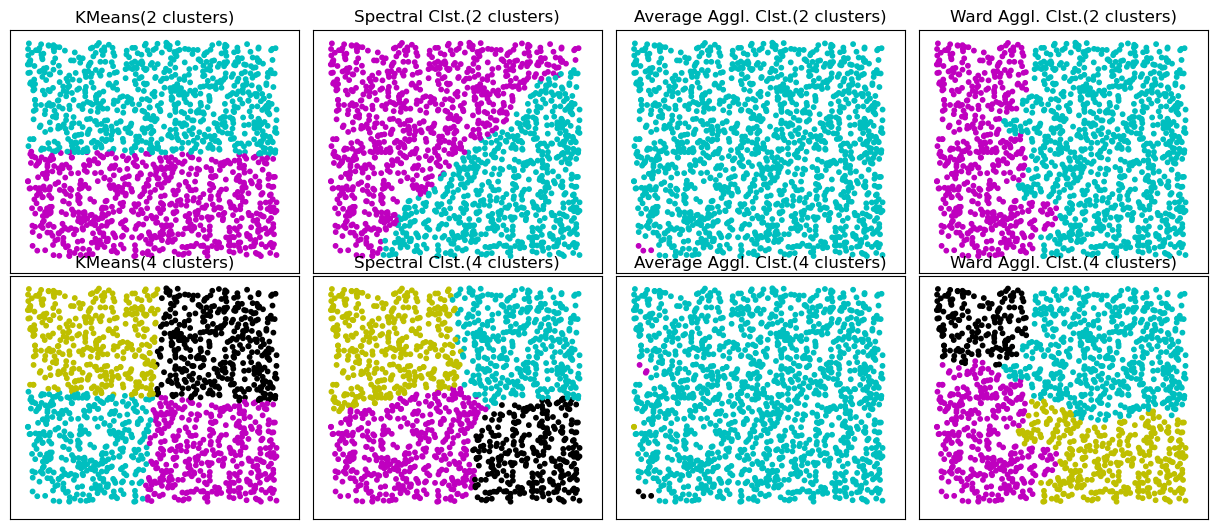

In [44]:
uniform = np.random.rand(n_samples, 2), None
plt.figure(figsize=(12, 10))
plt.subplots_adjust(left=.001, right=.999, bottom=.01, top=.99, wspace=.05, hspace=.01)
plot_num = 1

for i, n_clrs in enumerate([2,4]): # for i, c_clrs in (i=0, c_clrs=2 (2 clusters)) 
    dataset=uniform                # for i, c_clrs in (i=1, c_clrs=4 (4 clusters)) 
    i_dataset=0
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    connectivity = kneighbors_graph(X, n_neighbors=10)
    connectivity = 0.5 * (connectivity + connectivity.T)

    distances = euclidean_distances(X)

    kmeans = cluster.KMeans(n_clusters=n_clrs)
    spectral_clustering = cluster.SpectralClustering(n_clusters=n_clrs, 
                                          #eigen_solver='arpack',
                                          affinity="nearest_neighbors")
   # average_agglomerative = cluster.AgglomerativeClustering(linkage="average",connectivity=connectivity,
   #                         affinity="cityblock", n_clusters=n_clrs)
    average_agglomerative = cluster.AgglomerativeClustering(linkage="average",connectivity=connectivity,
                            metric="cityblock",   # instead of affinity
                            n_clusters=n_clrs
)
    
    ward_agglomerative = cluster.AgglomerativeClustering(n_clusters=n_clrs,
                    linkage='ward', connectivity=connectivity)

    for method, algr in [('KMeans', kmeans),('Spectral Clst.', spectral_clustering),
                            ('Average Aggl. Clst.', average_agglomerative),
                            ('Ward Aggl. Clst.', ward_agglomerative)]:
        algr.fit(X)
        y_pred = algr.labels_.astype(int)
        
        plt.subplot(4, 4, plot_num)
        if i == 0:
            plt.title(method+"(2 clusters)", size=12)
        if i == 1:
            plt.title(method+"(4 clusters)", size=12)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
            
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1
#plt.savefig("../Output/uniform.png",dpi=300, bbox_inches='tight')
plt.show()


## Comparison 2: K-means, Spectral, Agg-avg, and Agg-ward for 4-blobs data using k=2 and k=4 

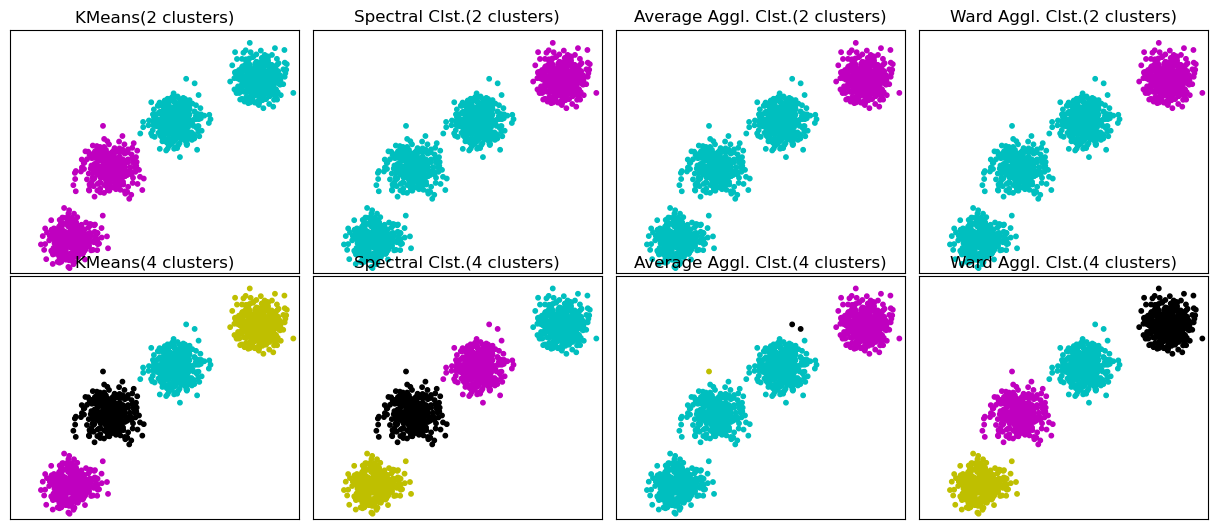

In [48]:
spheres = datasets.make_blobs(n_samples=n_samples, random_state=3, centers=4)

plt.figure(figsize=(12, 10))
plt.subplots_adjust(left=.001, right=.999, bottom=.01, top=.99, wspace=.05, hspace=.01)
plot_num = 1

print(enumerate([2,4]))

for i, n_clrs in enumerate([2,4]):
    dataset=spheres
    i_dataset=0
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    connectivity = kneighbors_graph(X, n_neighbors=10)
    connectivity = 0.5 * (connectivity + connectivity.T)

    distances = euclidean_distances(X)

    kmeans = cluster.KMeans(n_clusters=n_clrs)
    spectral_clustering = cluster.SpectralClustering(n_clusters=n_clrs, 
                                          #eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    #average_agglomerative = cluster.AgglomerativeClustering(linkage="average",connectivity=connectivity,
    #                        affinity="cityblock", n_clusters=n_clrs)
    average_agglomerative = cluster.AgglomerativeClustering(linkage="average",connectivity=connectivity,
                            metric="cityblock",   # instead of affinity
                            n_clusters=n_clrs)
    ward_agglomerative = cluster.AgglomerativeClustering(n_clusters=n_clrs,
                    linkage='ward', connectivity=connectivity)

    for method, algr in [('KMeans', kmeans),('Spectral Clst.', spectral_clustering),
                            ('Average Aggl. Clst.', average_agglomerative),
                            ('Ward Aggl. Clst.', ward_agglomerative)]:
        algr.fit(X)
        y_pred = algr.labels_.astype(int)
        
        plt.subplot(4, 4, plot_num)
        if i == 0:
            plt.title(method+"(2 clusters)", size=12)
        if i == 1:
            plt.title(method+"(4 clusters)", size=12)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
            
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1
plt.savefig("../Output/blobs.png",dpi=300, bbox_inches='tight')
plt.show()


## Comparison 3: K-means, Spectral, Agg-avg, and Agg-ward for 2-moons data using k=2 and k=4 

<Figure size 1200x1000 with 0 Axes>

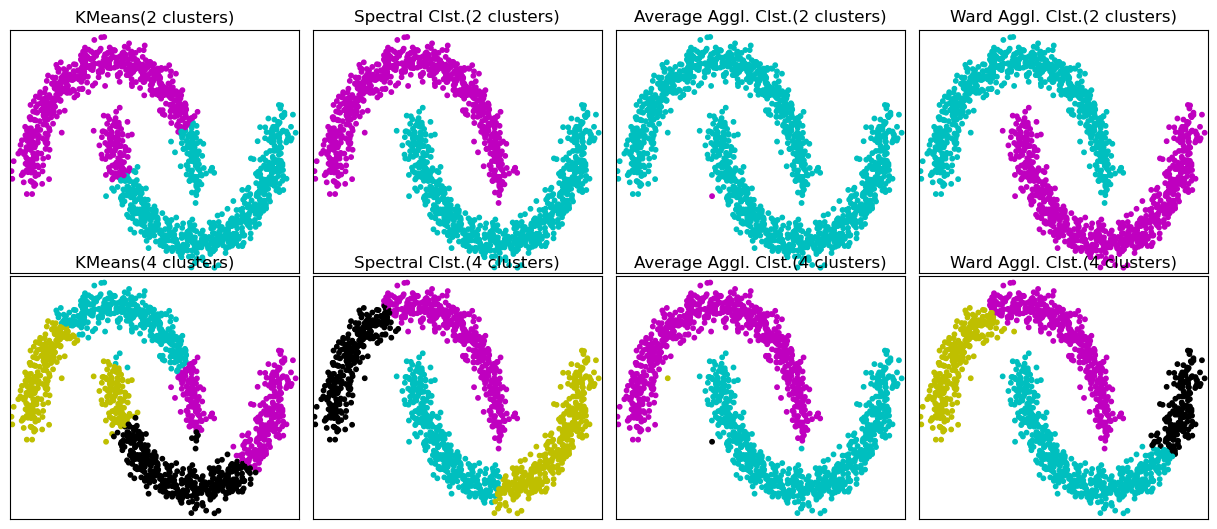

In [51]:
moons = datasets.make_moons(n_samples=n_samples, noise=.08)

plt.figure(figsize=(12, 10))
plt.subplots_adjust(left=.001, right=.999, bottom=.01, top=.99, wspace=.05, hspace=.01)
plot_num = 1

for i, n_clrs in enumerate([2,4]):
    dataset=moons
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    connectivity = kneighbors_graph(X, n_neighbors=10)
    connectivity = 0.5 * (connectivity + connectivity.T)
    distances = euclidean_distances(X)

    kmeans = cluster.KMeans(n_clusters=n_clrs)
    spectral_clustering = cluster.SpectralClustering(n_clusters=n_clrs, affinity="nearest_neighbors")
    #average_agglomerative = cluster.AgglomerativeClustering(linkage="average",connectivity=connectivity,
    #                        affinity="cityblock", n_clusters=n_clrs)
    average_agglomerative = cluster.AgglomerativeClustering(linkage="average",connectivity=connectivity,
                            metric="cityblock",   # instead of affinity
                            n_clusters=n_clrs)
    ward_agglomerative = cluster.AgglomerativeClustering(n_clusters=n_clrs,
                    linkage='ward', connectivity=connectivity)

    for method, algr in [('KMeans', kmeans),('Spectral Clst.', spectral_clustering),
                            ('Average Aggl. Clst.', average_agglomerative),
                            ('Ward Aggl. Clst.', ward_agglomerative)]:
        algr.fit(X)
        y_pred = algr.labels_.astype(int)
        
        plt.subplot(4, 4, plot_num)
        if i == 0:
            plt.title(method+"(2 clusters)", size=12)
        if i == 1:
            plt.title(method+"(4 clusters)", size=12)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
            
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1
plt.savefig("../Output/moons.png" , bbox_inches='tight')
plt.show()


### Example: 4 clustering algorithms, 4 clusters, 4 data types

The code provided by scikit-learn for comparing the different clustering techniques when  $k=4$  is as follows:

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

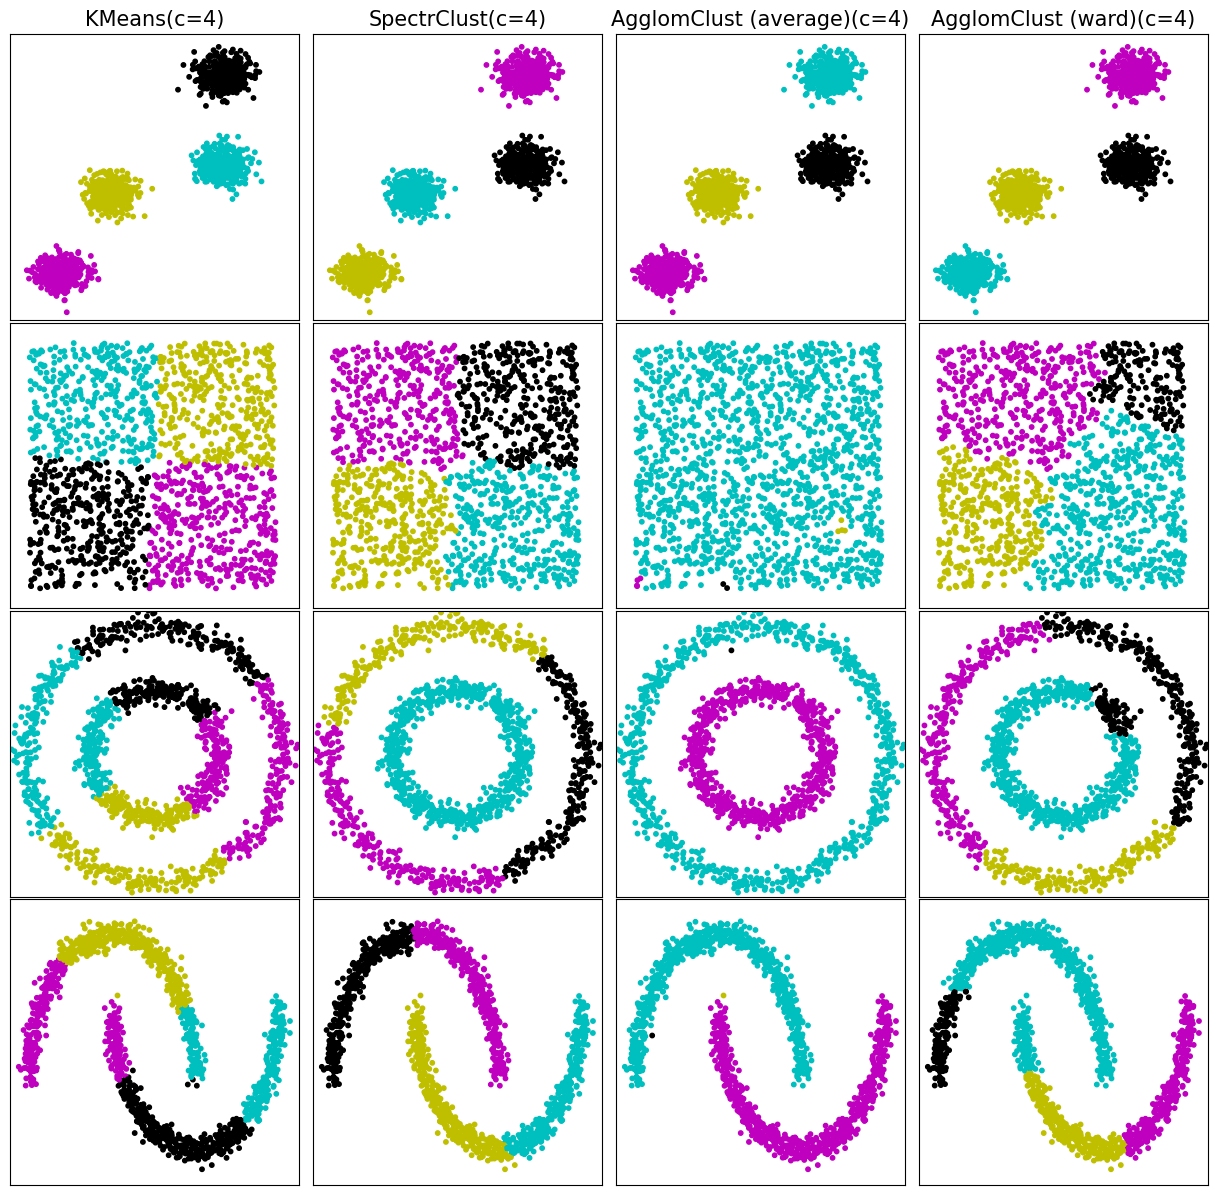

In [55]:
plt.figure(figsize=(12, 12))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05, hspace=.01)
plot_num = 1
Number_Clusters = 4

for i_dataset, dataset in enumerate([blobs,
                                     no_structure, noisy_circles, noisy_moons]):
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    connectivity = kneighbors_graph(X, n_neighbors=10)
    connectivity = 0.5 * (connectivity + connectivity.T)

    distances = euclidean_distances(X)

    means = cluster.KMeans(n_clusters=Number_Clusters)
    
    spectral = cluster.SpectralClustering(n_clusters=Number_Clusters, eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    
    #average_linkage = cluster.AgglomerativeClustering(linkage="average",
    #                       affinity="cityblock", n_clusters=Number_Clusters,
    #                       connectivity=connectivity)
    average_linkage = cluster.AgglomerativeClustering(linkage="average",connectivity=connectivity,
                            metric="cityblock",   # instead of affinity
                            n_clusters=Number_Clusters)
    
    ward = cluster.AgglomerativeClustering(n_clusters=Number_Clusters,
                    linkage='ward', connectivity=connectivity)

    for name, algorithm in [('KMeans', means),('SpectrClust', spectral),
                            ('AgglomClust (average)', average_linkage),
                            ('AgglomClust (ward)', ward)]:
        algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(4, 4, plot_num)
        if i_dataset == 0:
            plt.title(name+"(c="+str(Number_Clusters)+")", size=15)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
            
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1


plt.show()


### Example: 4 clustering algorithms, 2 clusters, 4 data types

The code provided by scikit-learn for comparing the different clustering techniques when $k=2$ is as follows:

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

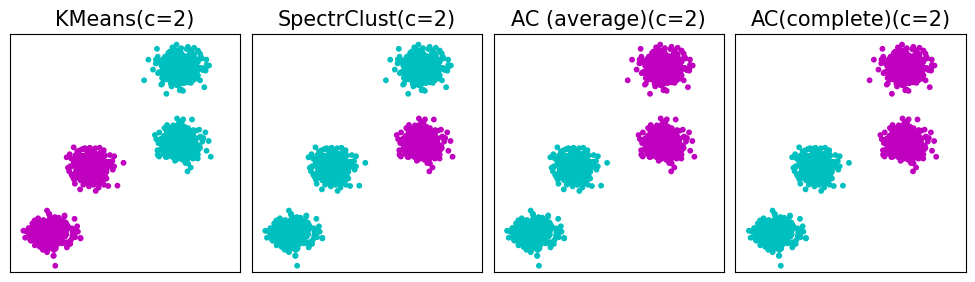

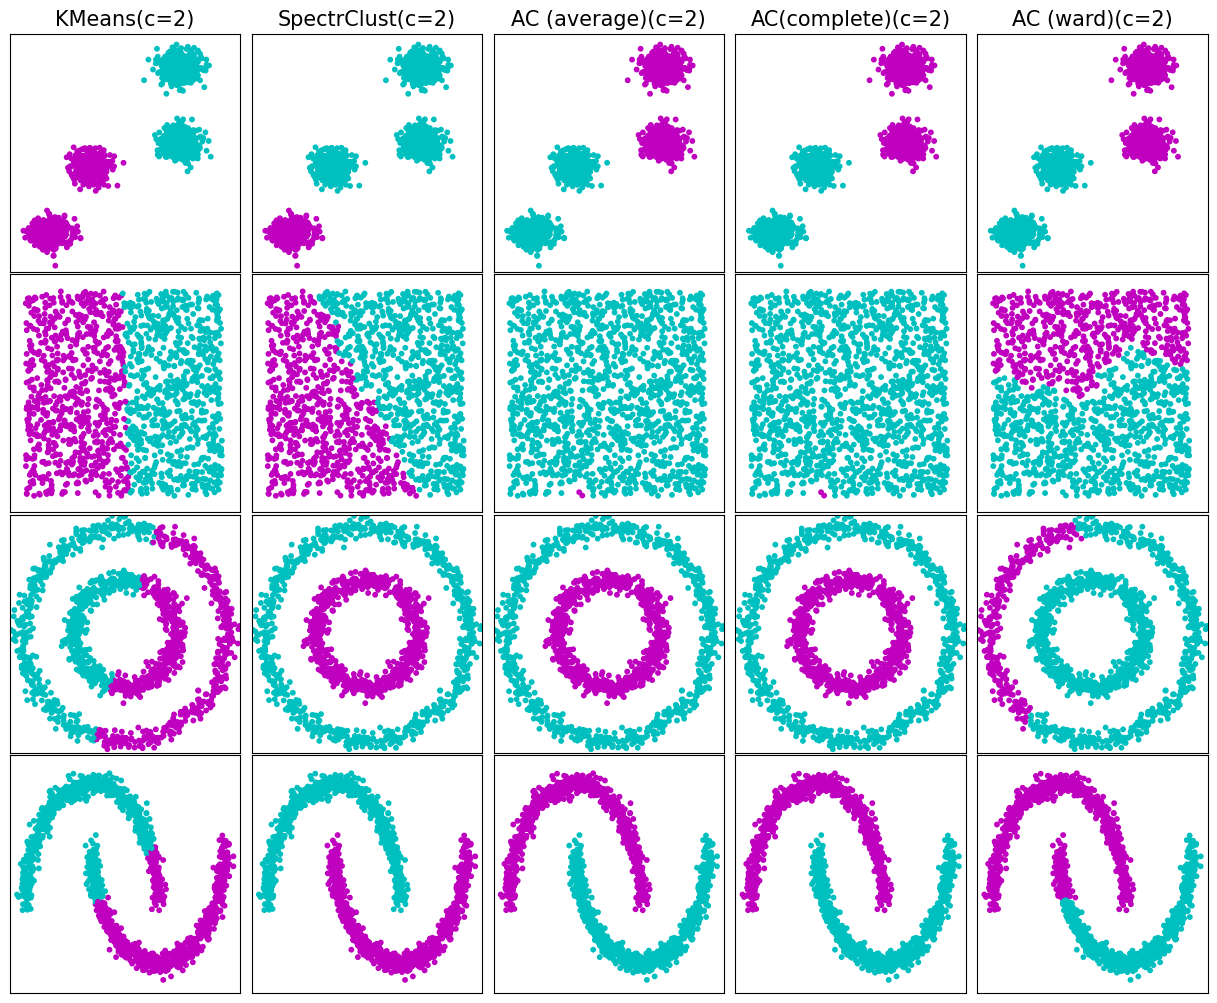

In [59]:
plt.figure(figsize=(12, 10))
#plt.figure(figsize=(16, 12))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96,  wspace=.05, hspace=.01)

plot_num = 1
Number_Clusters = 2

for i_dataset, dataset in enumerate([blobs, no_structure, noisy_circles, 
                                     noisy_moons]):
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    connectivity = kneighbors_graph(X, n_neighbors=10)
    connectivity = 0.5 * (connectivity + connectivity.T)

    distances = euclidean_distances(X)

    means = cluster.KMeans(n_clusters=2)
    spectral = cluster.SpectralClustering(n_clusters=Number_Clusters, eigen_solver='arpack',
                            affinity="nearest_neighbors")
    #average_linkage = cluster.AgglomerativeClustering(linkage="average", 
    #                        affinity="cityblock", n_clusters=Number_Clusters, 
    #                        connectivity=connectivity)
    average_linkage = cluster.AgglomerativeClustering(linkage="average",connectivity=connectivity,
                            metric="cityblock",   # instead of affinity
                            n_clusters=Number_Clusters)
    #complete_linkage = cluster.AgglomerativeClustering(linkage="complete", 
    #                        affinity="cityblock", n_clusters=Number_Clusters, 
    #                        connectivity=connectivity)
    complete_linkage = cluster.AgglomerativeClustering(linkage="complete",connectivity=connectivity,
                            metric="cityblock",   # instead of affinity
                            n_clusters=Number_Clusters)
    #ward_linkage = cluster.AgglomerativeClustering(n_clusters=Number_Clusters,
    #                        linkage='ward', connectivity=connectivity)
    ward_linkage = cluster.AgglomerativeClustering(linkage="ward",connectivity=connectivity,
                            n_clusters=Number_Clusters)

    for name, algorithm in [
                            ('KMeans', means),
                            ('SpectrClust', spectral),
                            ('AC (average)', average_linkage),
                            ('AC(complete)', complete_linkage),
                            ('AC (ward)', ward_linkage)
                           ]:
        algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(4, 5, plot_num)
        
        if i_dataset == 0:
            plt.title(name+"(c="+str(Number_Clusters)+")", size=15)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.show()

We applied the discussed clustering techniques, namely: K-means, agglomerative clustering with average linkage, agglomerative clustering with complete linkage, agglomerative clustering with Ward linkage and spectral clustering.  Connectivity is applied in the algorithms where it is applicable. Regarding the simple cases of separated clusters of data, all clustering algorithms perform well, as expected. Regarding uniform distribution of data, K-means, Ward agglomerative clustering and spectral clustering tend to obtain even and compact clusters, while complete linkage and average linkage agglomerative clusterings try to agglomerate as much as possible close points following the rule: "rich get richer". This results in a second cluster of a small set of data. Regarding the embedded structures as in the case of the circles (the third row), K-means and Ward linkage agglomerative clustering try to obtain compact clusters and thus cannot separate the circles. Similar effect is observed with the moons example (the fourth row). Another fact worthful to emphasize from the illustrating example is the importance of knowing the number of clusters looked for, in the case of K-means, ward-linkage agglomerative clustering and spectral clustering, since the later also employs the K-means method. If k is not known, the average-linkage or complete-linkage agglomerative clustering is recommendable with the risk that it will not assure balanced clusters as final result.

# References

1. Scikit-Learn, Python Library for Machine Learning, http://scikit-learn.org/stable/index.html

_Last updated on 09.06.25 12:00am<br>
(C) 2025 Complex Adaptive Systems Laboratory, all rights reserved._